# UBER DRIVE DATA ANALYSIS

### Importing Liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [3]:
df = pd.read_csv(r'C:\Users\hp\Downloads\My Uber Drives - 2016 (2).csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
print(df.shape)

(1156, 7)


In [5]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

There are 6 categorical variables and 1 numerical variable 
###### START_DATE and END_DATE are to be converted to datetime variables

### Checking for NULL Values

In [6]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


##### As we can see this row contains wrong data for most of the columns. We can get rid of it

In [8]:
df.drop(df[df['END_DATE*'].isna()].index , axis = 0 , inplace = True)

In [9]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


#### Approximately 43.46% data of PURPOSE column is not available so we can remove the column for this analysis

In [11]:
df.drop(['PURPOSE*'] , axis = 1 , inplace = True)
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8


### Checking for duplicate rows

In [12]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [13]:
# Removing this duplicate row 
df.drop(df[df.duplicated()].index , axis = 0 , inplace = True)
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


#### Changing datatype of start_date and end_date

In [14]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

## EXPLORATORY DATA ANALYSIS

### 1. Category

In [15]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

#### Two ride categories : Business (for work related travel) and personal (for personal related travel)

In [16]:
df[['CATEGORY*' , 'MILES*']].groupby(['CATEGORY*']).agg(total_miles = ('MILES*' , 'sum'))

,total_miles
CATEGORY*,
Business,11477.1
Personal,717.7


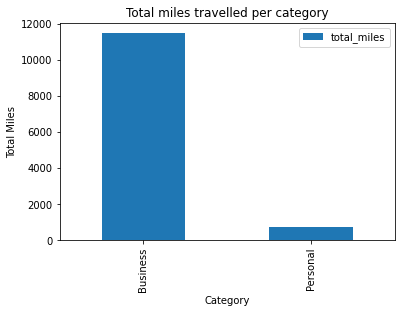

In [17]:
df[['CATEGORY*' , 'MILES*']].groupby(['CATEGORY*']).agg(total_miles = ('MILES*' , 'sum')).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total miles travelled per category')
plt.show()

In [18]:
distancePerCategory = df[['CATEGORY*' , 'MILES*']].groupby(['CATEGORY*']).agg(total_miles = ('MILES*' , 'sum'))

# Distance travelled for business purpose

distBusiness = distancePerCategory.loc['Business']['total_miles']

# Distance travelled for personal purpose

distPersonal = distancePerCategory.loc['Personal']['total_miles']

# Total distance travelled by user

total_distance = distBusiness + distPersonal

# Percentage miles travelled for each purpose
percentageBusiness = (distBusiness / total_distance) * 100
percentagePersonal = (distPersonal / total_distance) * 100

User mainly use uber cabs for business purpose i.e. work related travel
- Around 94.11 % miles were travelled for business purpose
- Around 5.88 % miles were travelled for personal purpose

### 2. Start Point of journey 

In [19]:
len(df['START*'].unique())

177

#### There are 177 unique starting points

In [20]:
# TOP 10 STARTING POINTS

df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

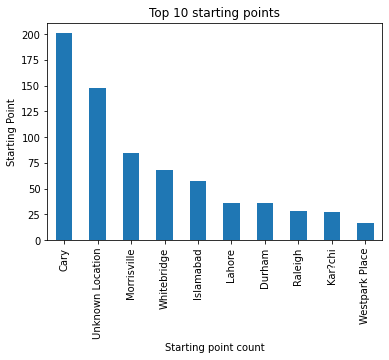

In [21]:
df['START*'].value_counts(ascending=False)[:10].plot(kind = 'bar')
plt.xlabel('Starting point count')
plt.ylabel('Starting Point')
plt.title('Top 10 starting points')
plt.show()

#### Cary is the most common starting point for this user 

### 3. Stop Point of journey

In [22]:
len(df['STOP*'].unique())

188

#### There are 188 unique stops

In [23]:
# TOP 10 STOPS

df['STOP*'].value_counts(ascending=False)[:10]

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

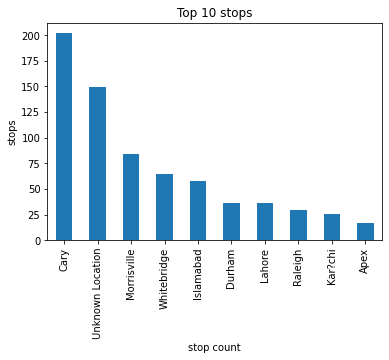

In [24]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind = 'bar')
plt.xlabel('stop count')
plt.ylabel('stops')
plt.title('Top 10 stops')
plt.show()

#### Cary is the most common starting point for this user 

### Cary is most common start point and stop for this user (maybe user's home is here)

In [25]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64

In [26]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

### 3. Miles

In [27]:
df.describe()

,MILES*
count,1154.000000
mean,10.567418
std,21.588452
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


Miles data is rightly skewed

In [28]:
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

##### Cary - Durham and Cary - Morrisville vice versa are farthest distance rides

### Checking for round trips

In [29]:
def isRoundTrip(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'
df['ROUND TRIP*'] = df.apply(isRoundTrip , axis=1)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND TRIP*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO


<AxesSubplot:xlabel='ROUND TRIP*', ylabel='count'>

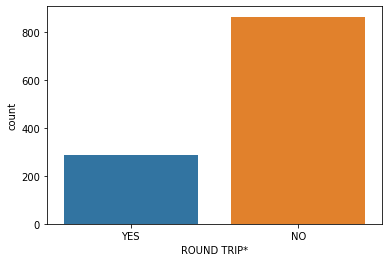

In [30]:
sns.countplot(x = 'ROUND TRIP*' , data = df)

In [31]:
df['ROUND TRIP*'].value_counts()

NO     866
YES    288
Name: ROUND TRIP*, dtype: int64

In [32]:
# No of round trips

roundTrips = len(df[df['ROUND TRIP*']=='YES'])

# No of single trips

singleTrips = len(df[df['ROUND TRIP*']=='NO'])

# No of total trips 

totalTrips = roundTrips + singleTrips

# Percentage of round trips and single trips
percentRound = (roundTrips / totalTrips) * 100
percentSingle = (singleTrips / totalTrips) * 100

print('% of round trips : {}'.format(percentRound))
print('% of Single trips : {}'.format(percentSingle))

% of round trips : 24.956672443674176
% of Single trips : 75.04332755632582


User mostly take single trip rides
- Around 25% are round trips
- Around 75% are single trips

#### Fetching day , date , month , year and hour of ride in separate columns 

In [33]:
df['Month'] = pd.to_datetime(df['START_DATE*']).dt.month
df['Day'] = pd.to_datetime(df['START_DATE*']).dt.day
df['Year'] = pd.to_datetime(df['START_DATE*']).dt.year
df['Hour'] = pd.to_datetime(df['START_DATE*']).dt.hour
df['day_of_week'] = pd.to_datetime(df['START_DATE*']).dt.dayofweek
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND TRIP*,Month,Day,Year,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,1,1,2016,21,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,1,2,2016,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,1,2,2016,20,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,1,5,2016,17,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,1,6,2016,14,2


In [34]:
def convertDayOfWeek(df):
    dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
    return dict[df['day_of_week']]
df['day_of_week'] = df.apply(convertDayOfWeek , axis = 1)

In [35]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND TRIP*,Month,Day,Year,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,1,1,2016,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,1,2,2016,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,1,2,2016,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,1,5,2016,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,1,6,2016,14,Wed


In [36]:
def convertMonth(df):
    dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
    return dict[df['Month']]
df['Month'] = df.apply(convertMonth , axis = 1)

In [37]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND TRIP*,Month,Day,Year,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,Jan,1,2016,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,Jan,2,2016,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,Jan,2,2016,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,Jan,5,2016,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,Jan,6,2016,14,Wed


#### Rides per month

In [38]:
print(df['Month'].value_counts())

Dec     146
Aug     133
Nov     122
Feb     115
Mar     113
Jul     112
Jun     107
Oct     106
Jan      61
Apr      54
May      49
Sept     36
Name: Month, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='count'>

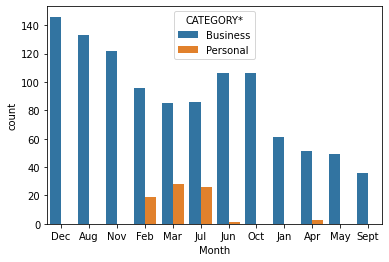

In [39]:
sns.countplot(x=df['Month'],data=df,hue='CATEGORY*',order=pd.value_counts(df['Month']).index)

### User took maximum rides in december and all were business trips

In [40]:
print(df['Month'].value_counts(ascending=False)[:5])

Dec    146
Aug    133
Nov    122
Feb    115
Mar    113
Name: Month, dtype: int64


Top 5 months having most trips : December , August , November , February , March

In [41]:
df['day_of_week'].value_counts(ascending=False)

Fri     206
Tue     175
Mon     174
Thur    154
Sat     150
Sun     148
Wed     147
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

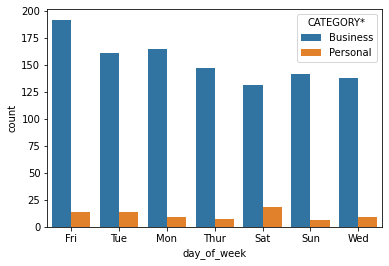

In [42]:
sns.countplot(x = 'day_of_week' , data = df , order = pd.value_counts(df['day_of_week']).index , hue = 'CATEGORY*')

### Maximum uber rides were taken on FRIDAY

<AxesSubplot:xlabel='Hour', ylabel='count'>

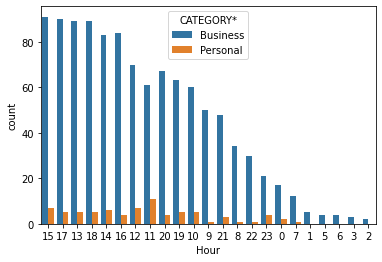

In [43]:
sns.countplot(x='Hour',data=df,order=pd.value_counts(df['Hour']).index,hue='CATEGORY*')

In [44]:
df['Hour'].value_counts(ascending=False)

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    25
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: Hour, dtype: int64

# CONCLUSIONS

#### User mainly uses Uber cabs for its Business purposes
    - Around 94% miles was consumed during Business trips.
    - Only 6% miles were consumed during personal trips.
#### There are 177 unique starting points
    - Cary is most poplular starting point for this driver.
#### There are 188 unique Stop points.
    - Cary is most poplular drop point for this driver.
    - Cary-Durham & Cary-Morrisville and vice versa are the User's longest distance Uber ride.
#### User usually takes single-trip Uber rides.
#### Around 75% trip is single-trip and 25% are Round-Trip.
#### User's Most number of rides were in month of December & Least were in September.
#### Friday has maximum number of trips.
#### Afternoons and evenings seem to have the maximum number of trips.